In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/Mall_Customers.csv')
print(d)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
d.shape

(200, 5)

In [ ]:
d['Gender'] = d['Gender'].map({'Male': 1, 'Female': 0})
print(d)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
d.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


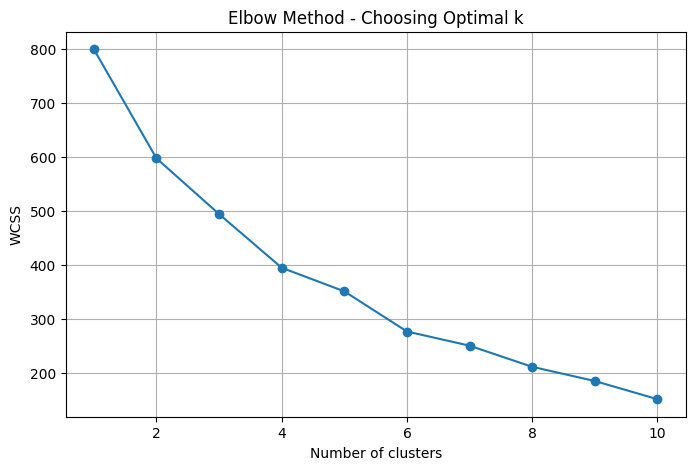

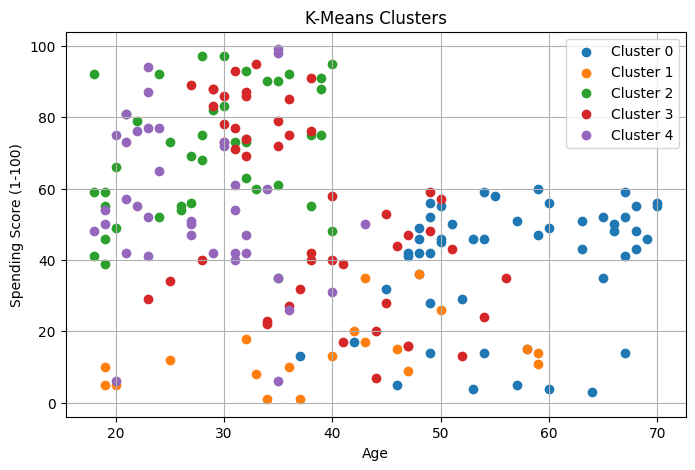

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/Mall_Customers.csv")
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Choosing Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,5))
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster]['Age'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.title('K-Means Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
print(df.head())


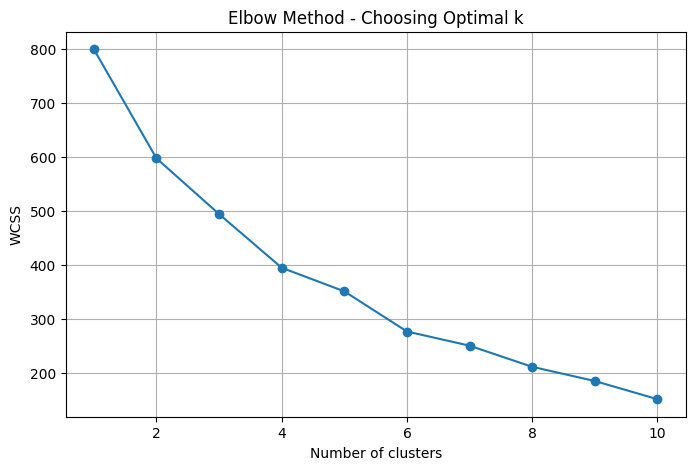

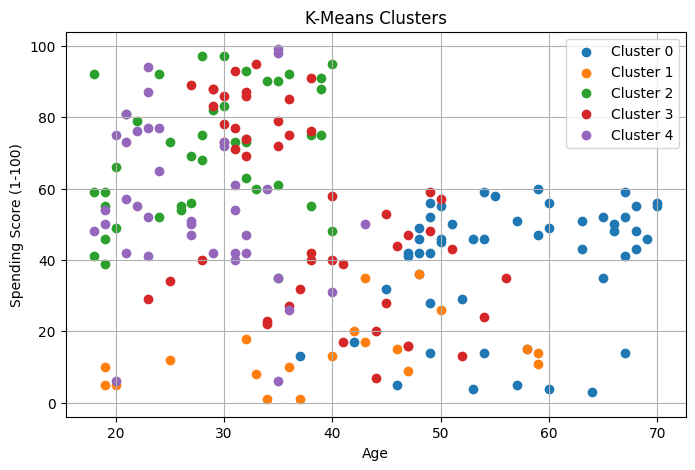

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/Mall_Customers.csv")
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Choosing Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,5))
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster]['Age'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.title('K-Means Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
print(df.head())